In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data = pd.read_csv("C:/Users/charl/Downloads/abalone/abalone.csv")

In [3]:
data.head

<bound method NDFrame.head of       M  0.455  0.365  0.095   0.514  0.2245   0.101    0.15  15
0     M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
1     F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
2     M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
3     I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
4     I  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.1200   8
...  ..    ...    ...    ...     ...     ...     ...     ...  ..
4171  F  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4172  M  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4173  M  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4174  F  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4175  M  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

[4176 rows x 9 columns]>

In [4]:
data.shape

(4176, 9)

In [5]:

data.columns

Index(['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15',
       '15'],
      dtype='object')

In [6]:
df = pd.DataFrame(data)
# column 명 변경
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# 변경된 데이터셋 출력
print(df)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.350     0.265   0.090        0.2255          0.0995   
1      F   0.530     0.420   0.135        0.6770          0.2565   
2      M   0.440     0.365   0.125        0.5160          0.2155   
3      I   0.330     0.255   0.080        0.2050          0.0895   
4      I   0.425     0.300   0.095        0.3515          0.1410   
...   ..     ...       ...     ...           ...             ...   
4171   F   0.565     0.450   0.165        0.8870          0.3700   
4172   M   0.590     0.440   0.135        0.9660          0.4390   
4173   M   0.600     0.475   0.205        1.1760          0.5255   
4174   F   0.625     0.485   0.150        1.0945          0.5310   
4175   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.0485        0.0700      7  
1             0.1415        0.2100      9  
2             0.1140        0.1550     10  
3      

In [7]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [8]:
df.head

<bound method NDFrame.head of       Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       2   0.350     0.265   0.090        0.2255          0.0995   
1       0   0.530     0.420   0.135        0.6770          0.2565   
2       2   0.440     0.365   0.125        0.5160          0.2155   
3       1   0.330     0.255   0.080        0.2050          0.0895   
4       1   0.425     0.300   0.095        0.3515          0.1410   
...   ...     ...       ...     ...           ...             ...   
4171    0   0.565     0.450   0.165        0.8870          0.3700   
4172    2   0.590     0.440   0.135        0.9660          0.4390   
4173    2   0.600     0.475   0.205        1.1760          0.5255   
4174    0   0.625     0.485   0.150        1.0945          0.5310   
4175    2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.0485        0.0700      7  
1             0.1415        0.2100      9  
2        

In [9]:
df1 = pd.DataFrame(df)

In [10]:
df1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [11]:
# 결측치 확인
missing_values = df1.isnull().sum()

# 결측치 출력
print("결측치 확인:\n", missing_values)

결측치 확인:
 Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


In [12]:
!pip install sweetviz

In [13]:
import sweetviz

                                             |          | [  0%]   00:00 -> (? left)


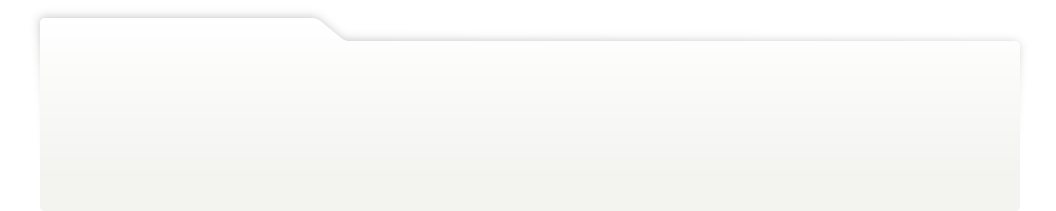
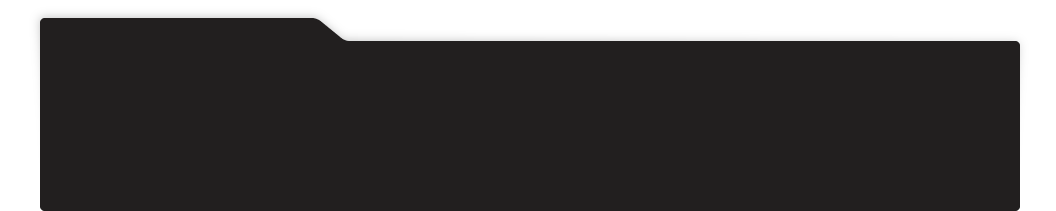
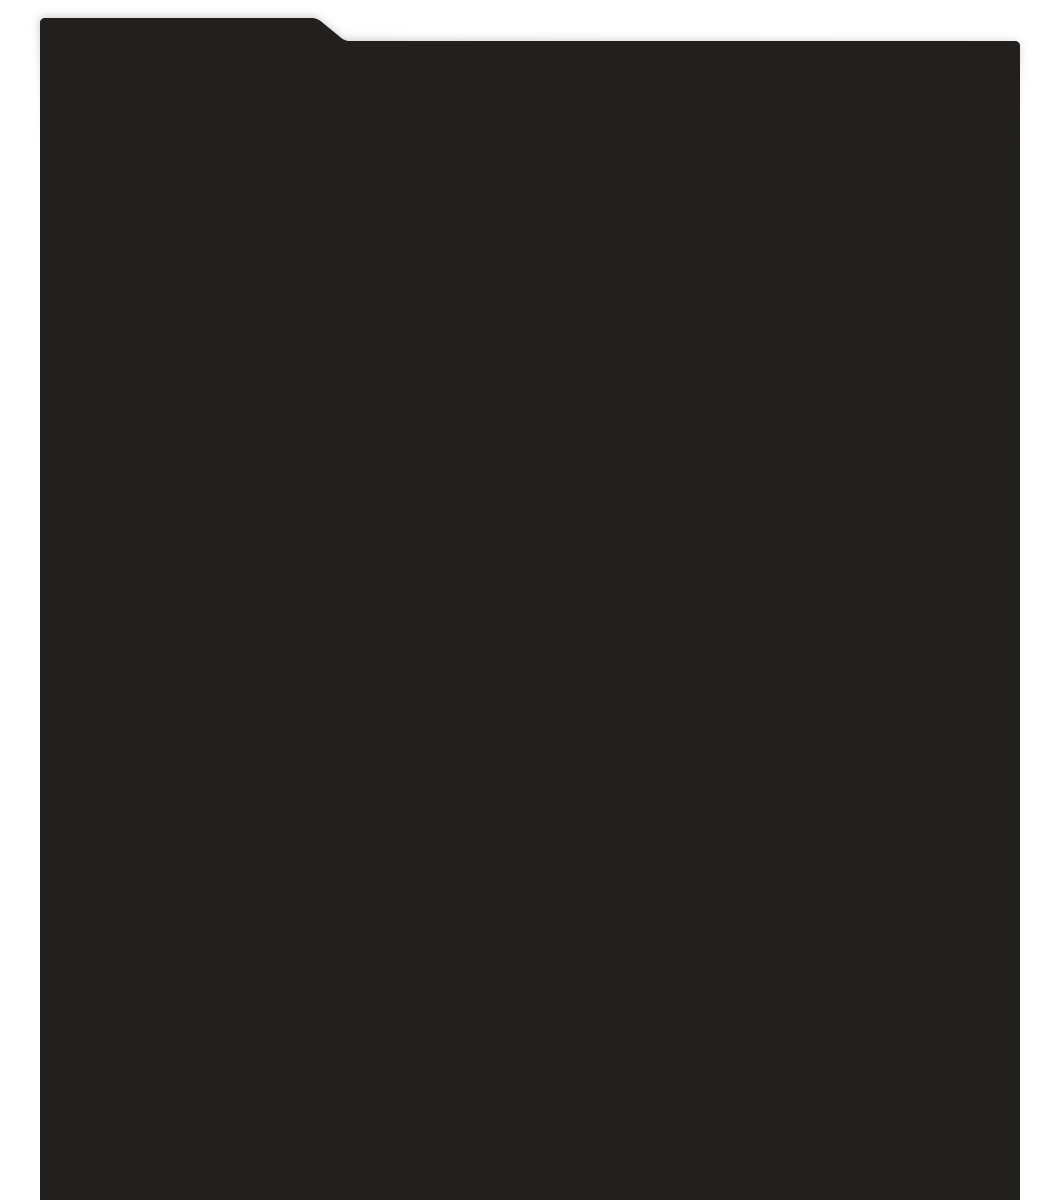
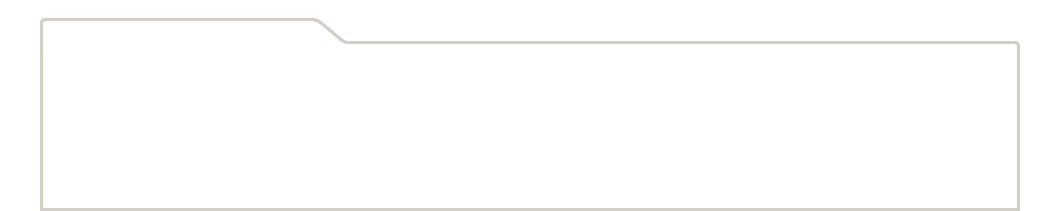
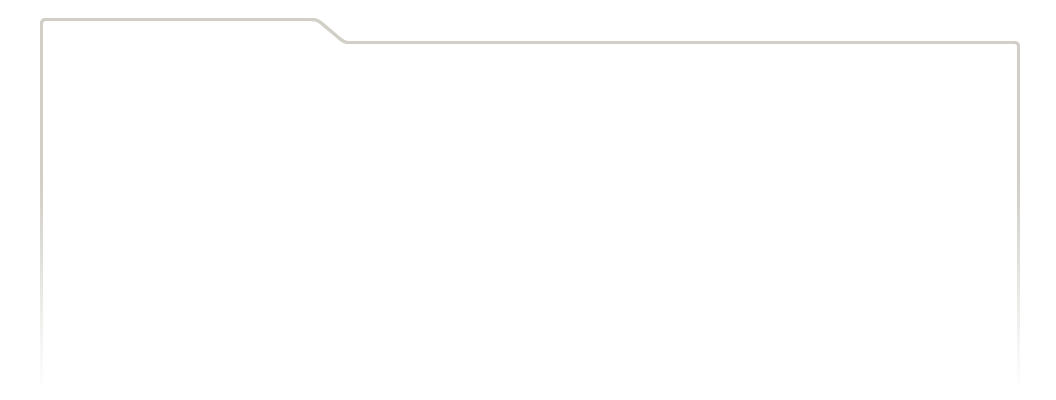
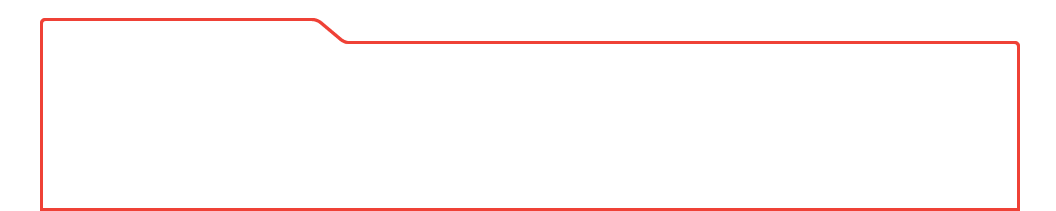
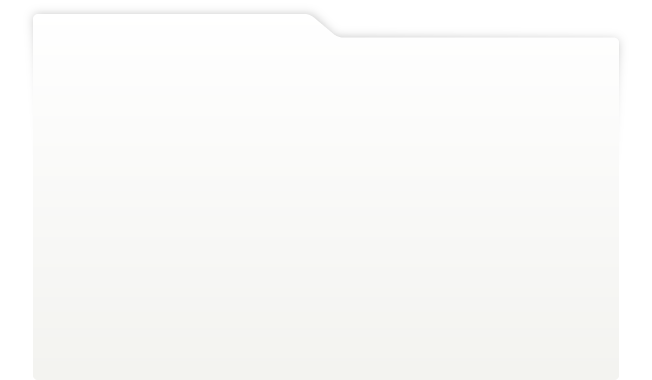
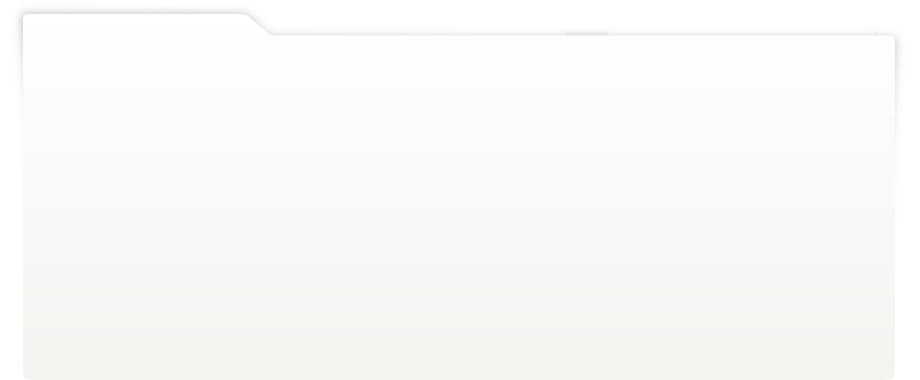
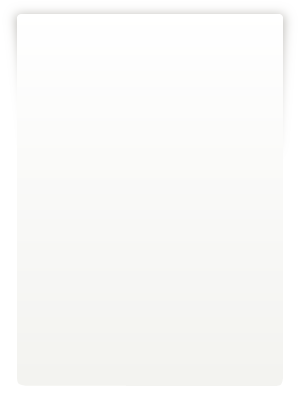
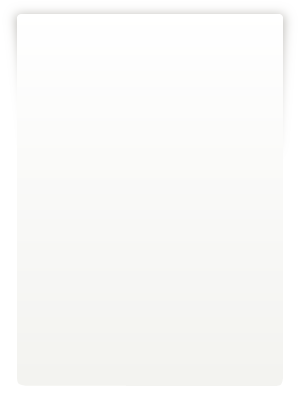
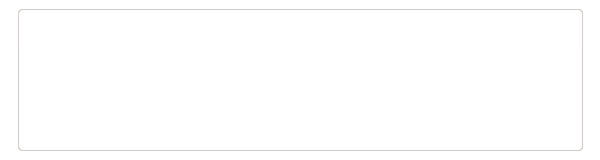
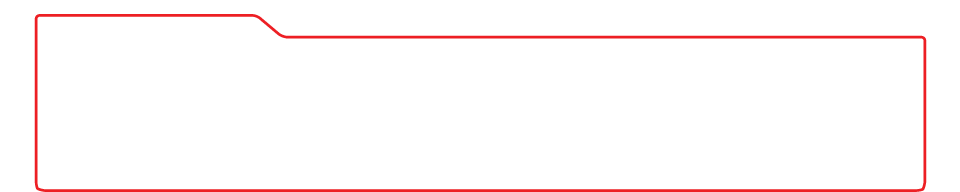
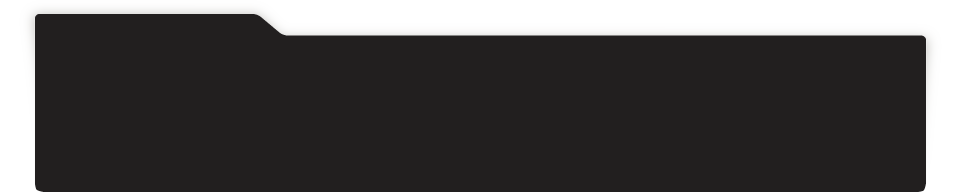
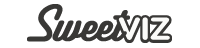
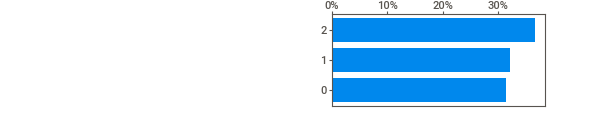
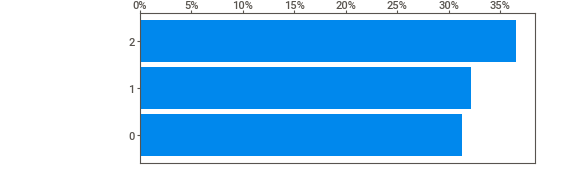
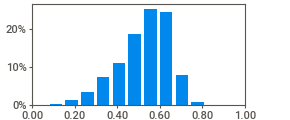
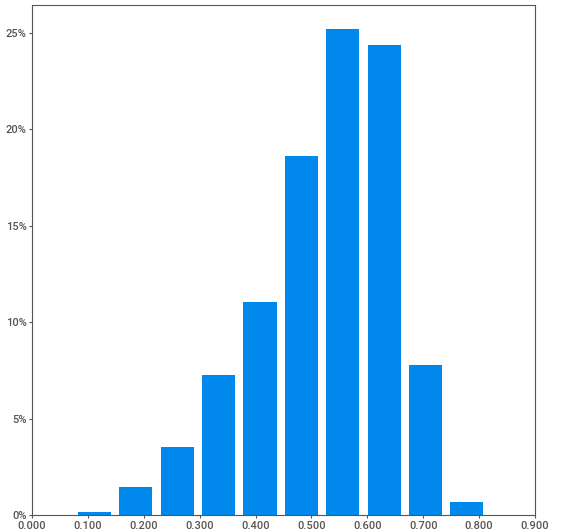
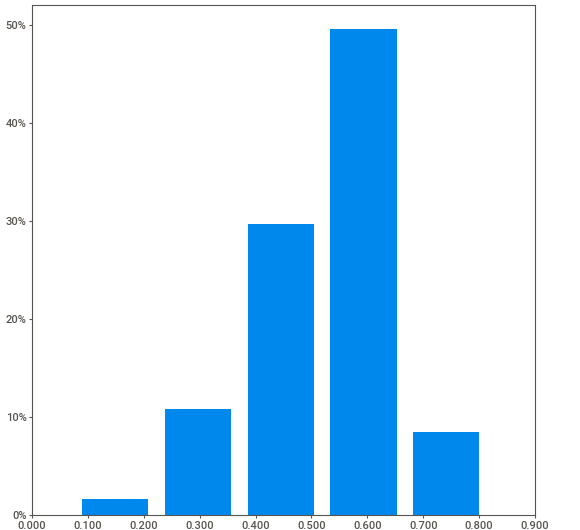
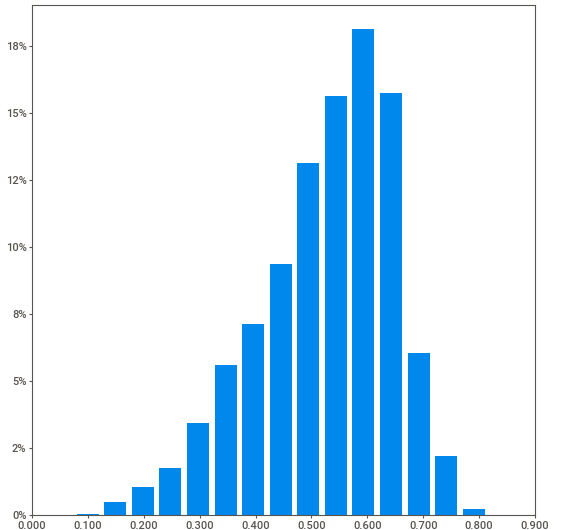
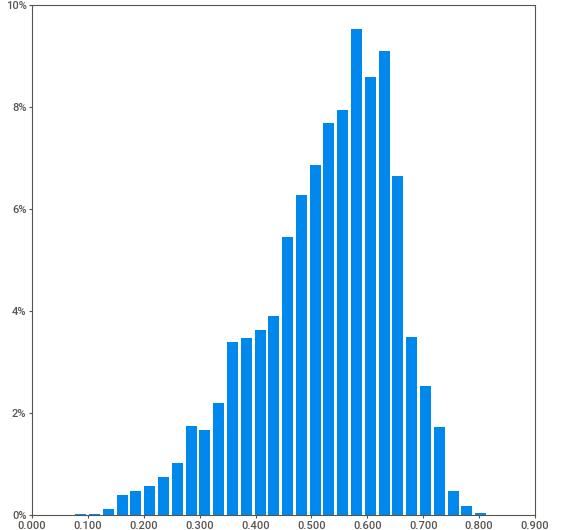
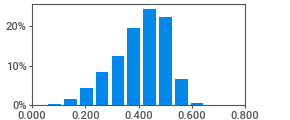
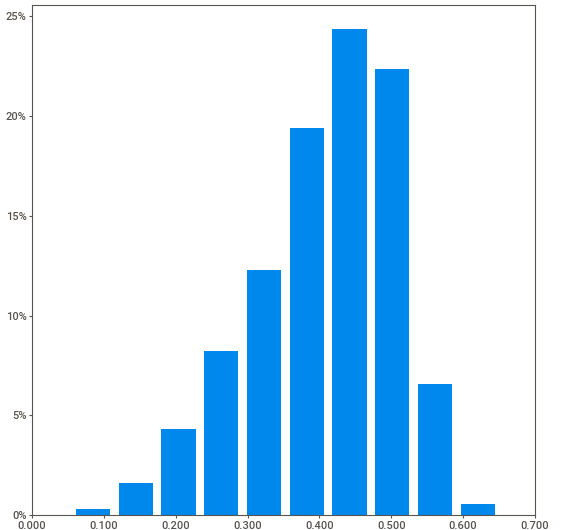
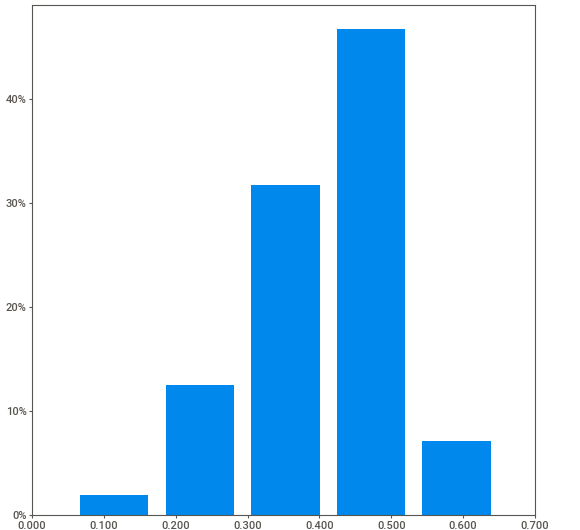
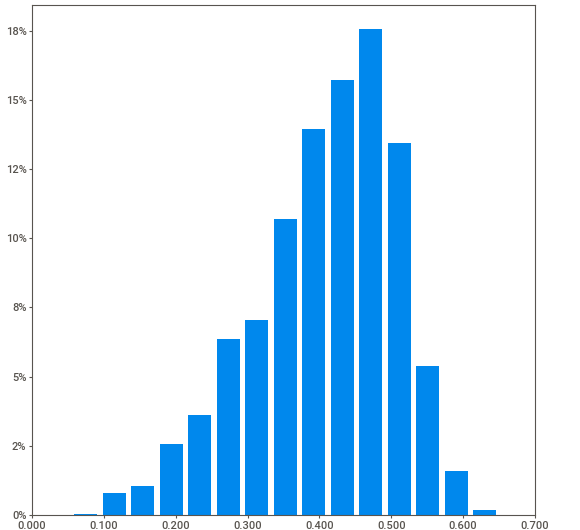
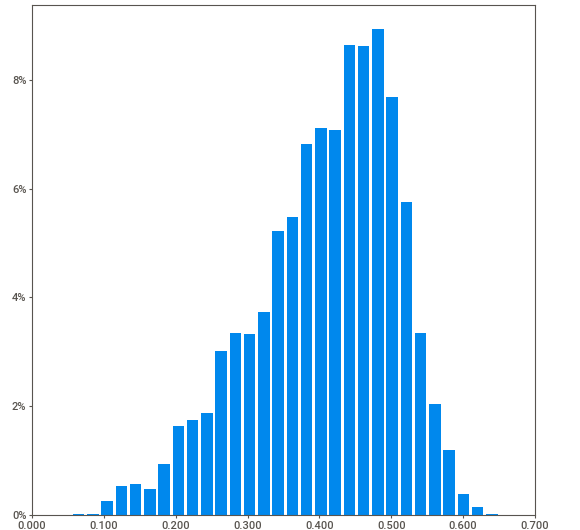
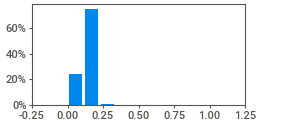
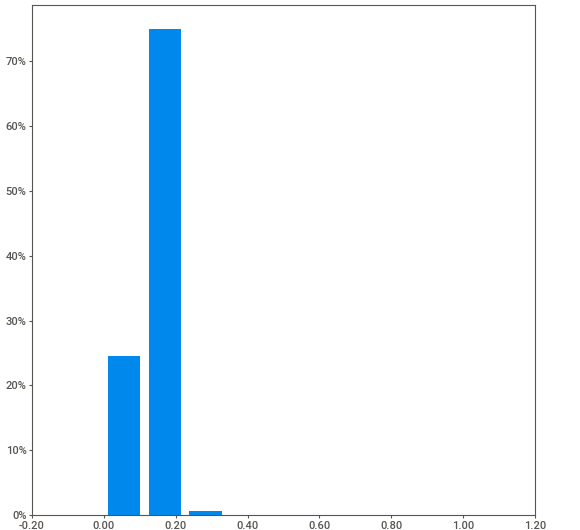
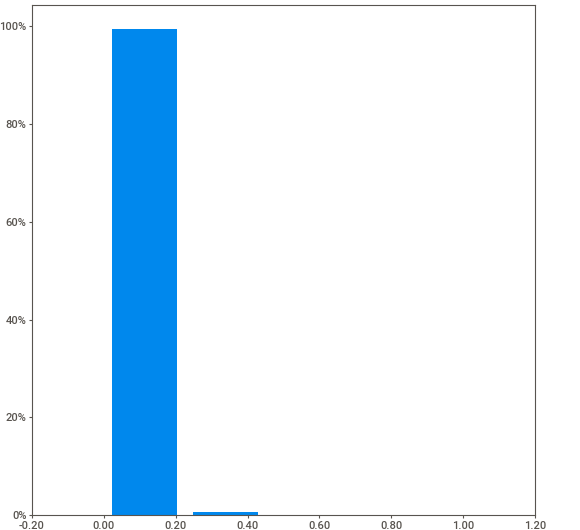
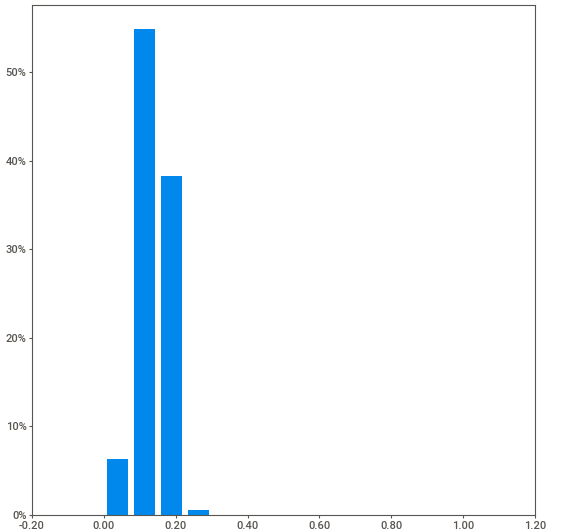
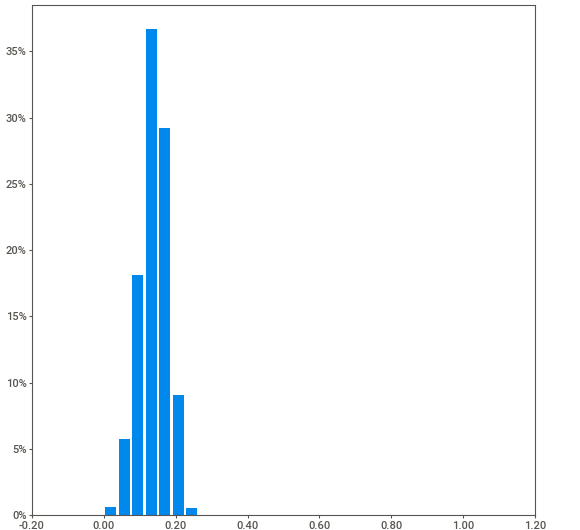
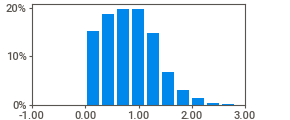
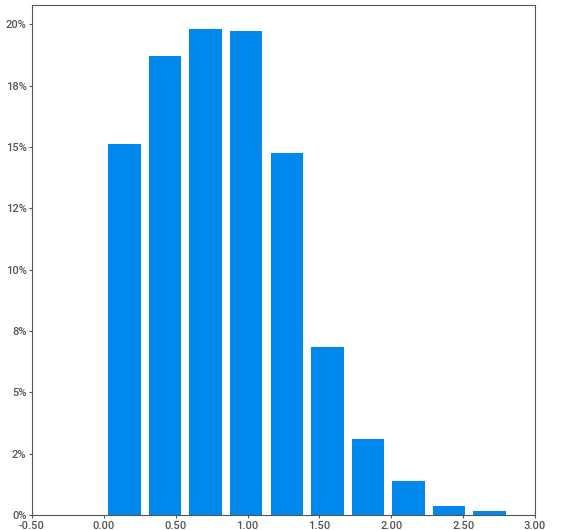
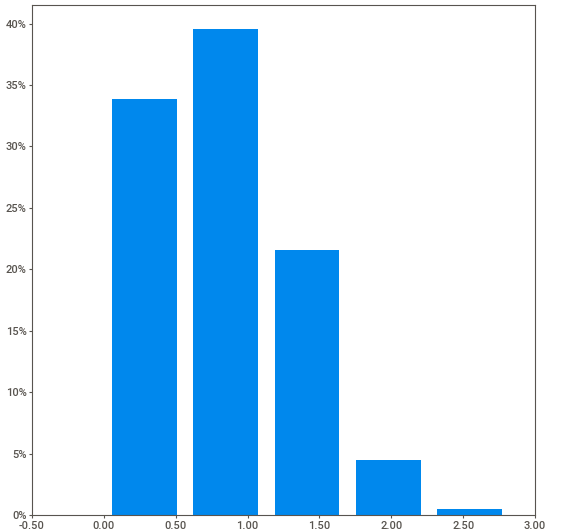
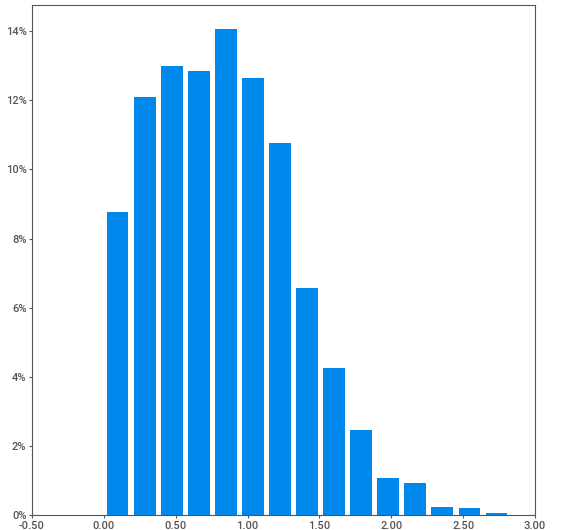
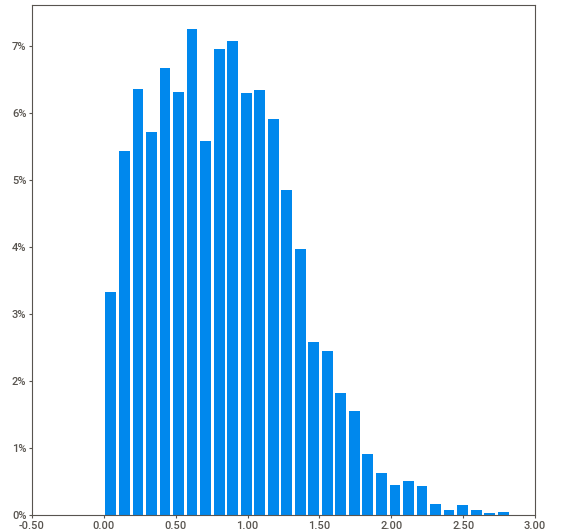
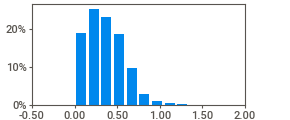
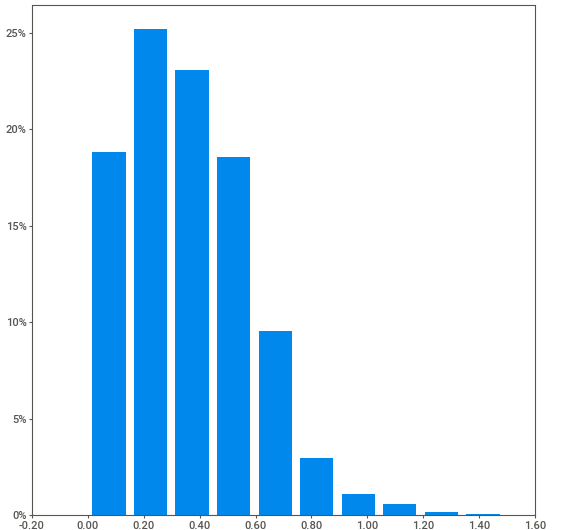
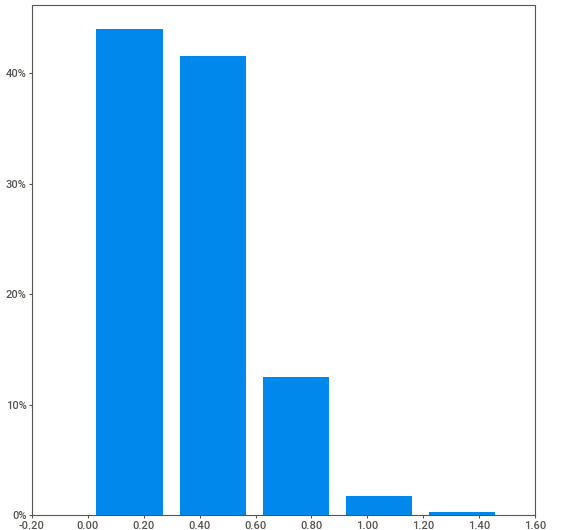
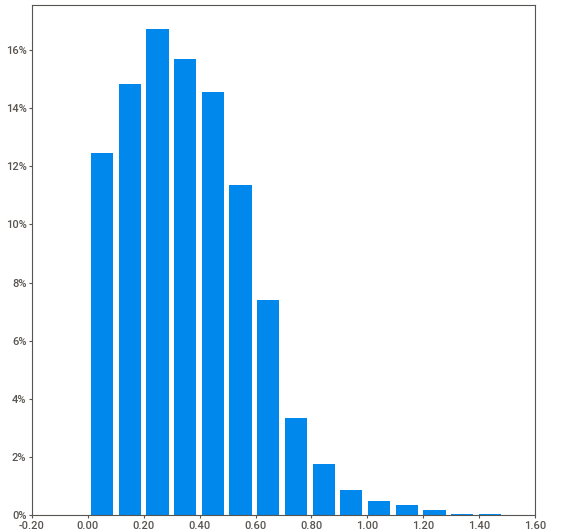
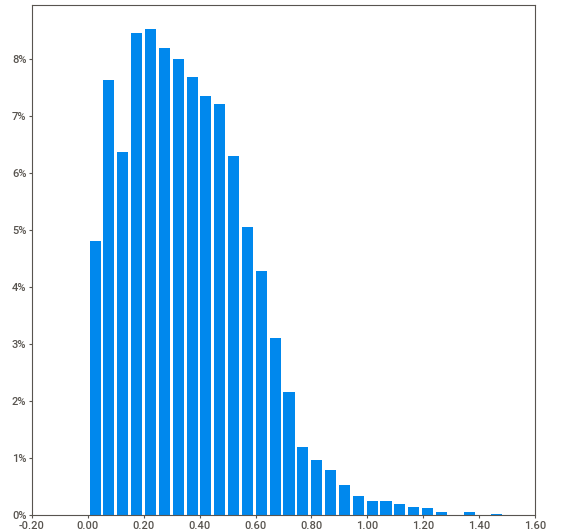
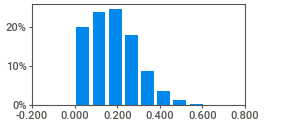
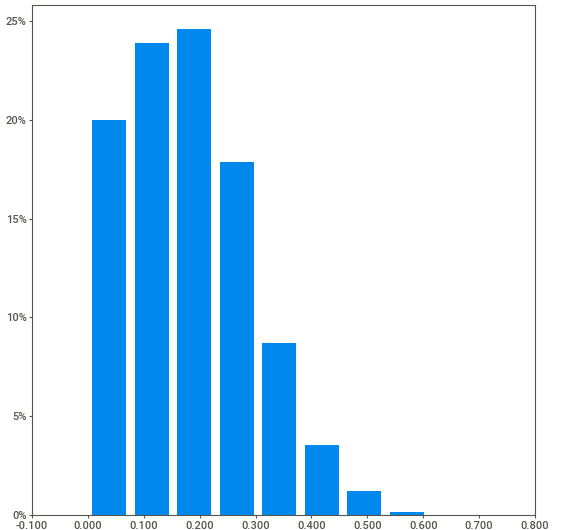
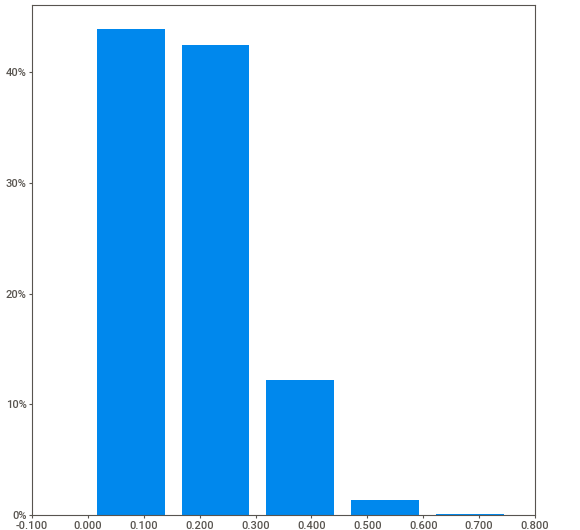
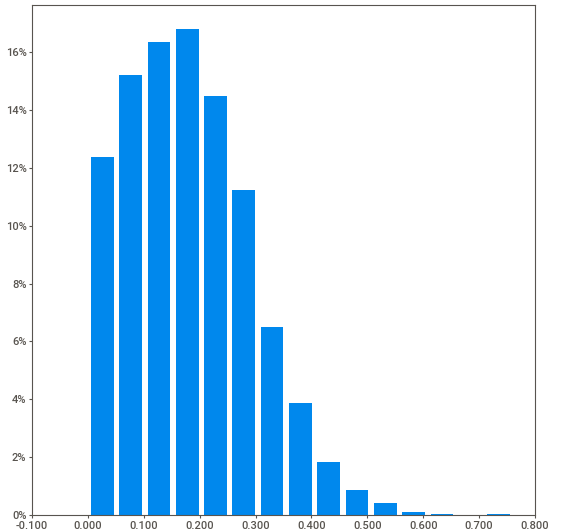
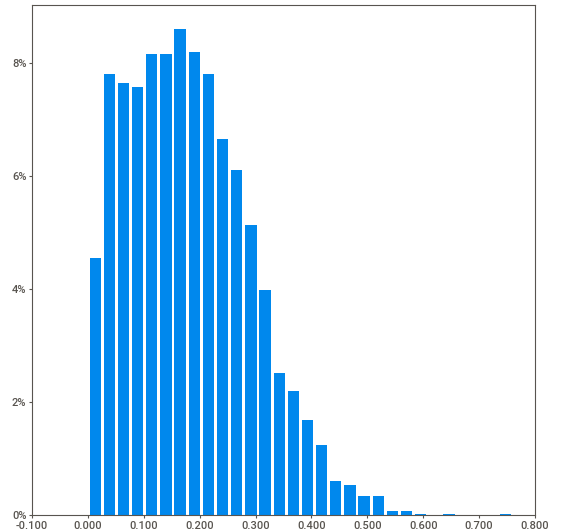
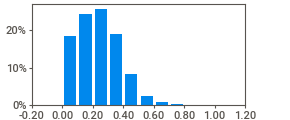
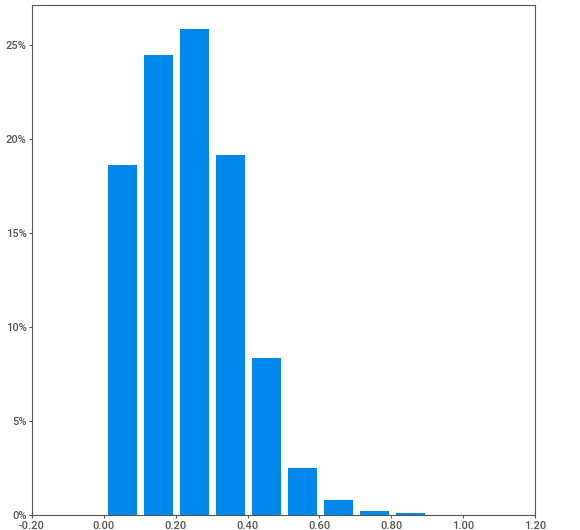
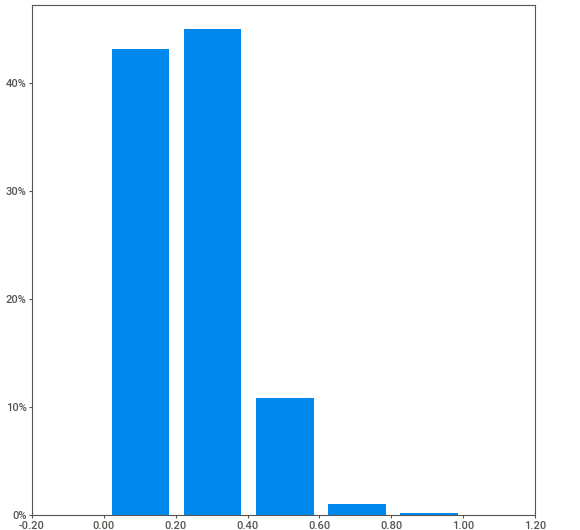
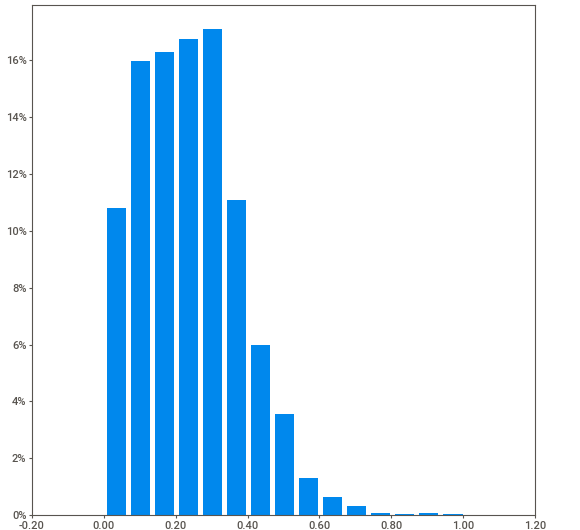
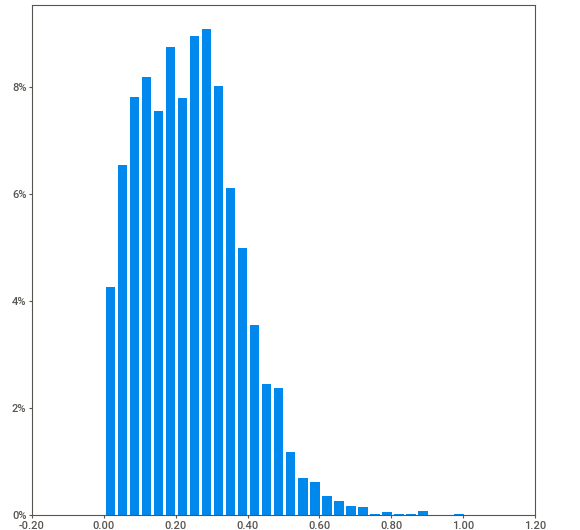
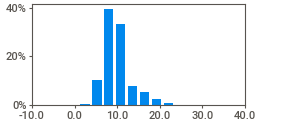
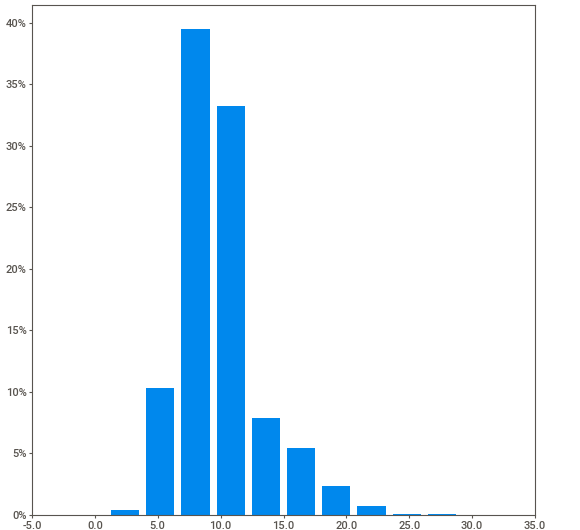
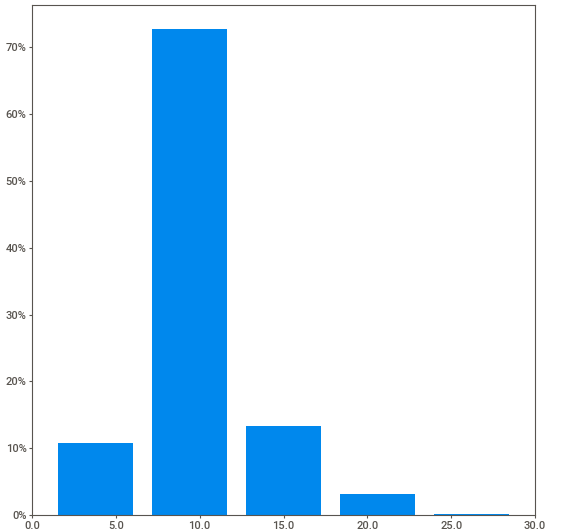
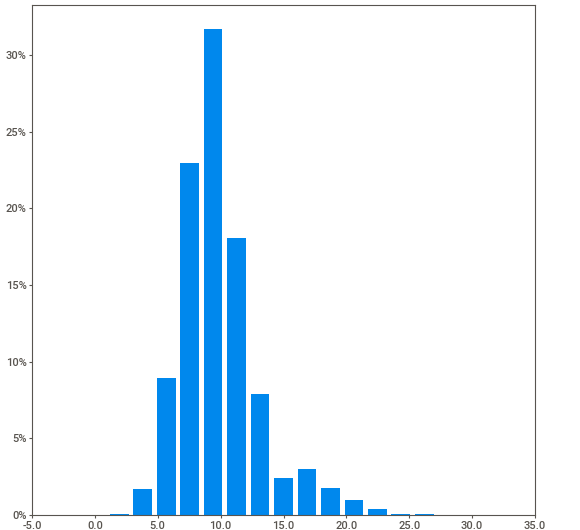
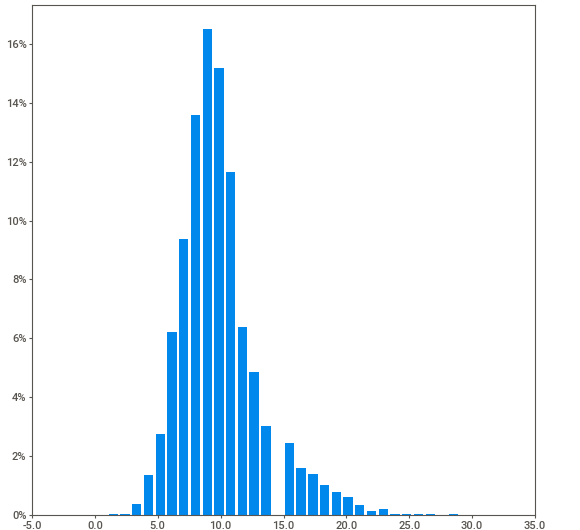
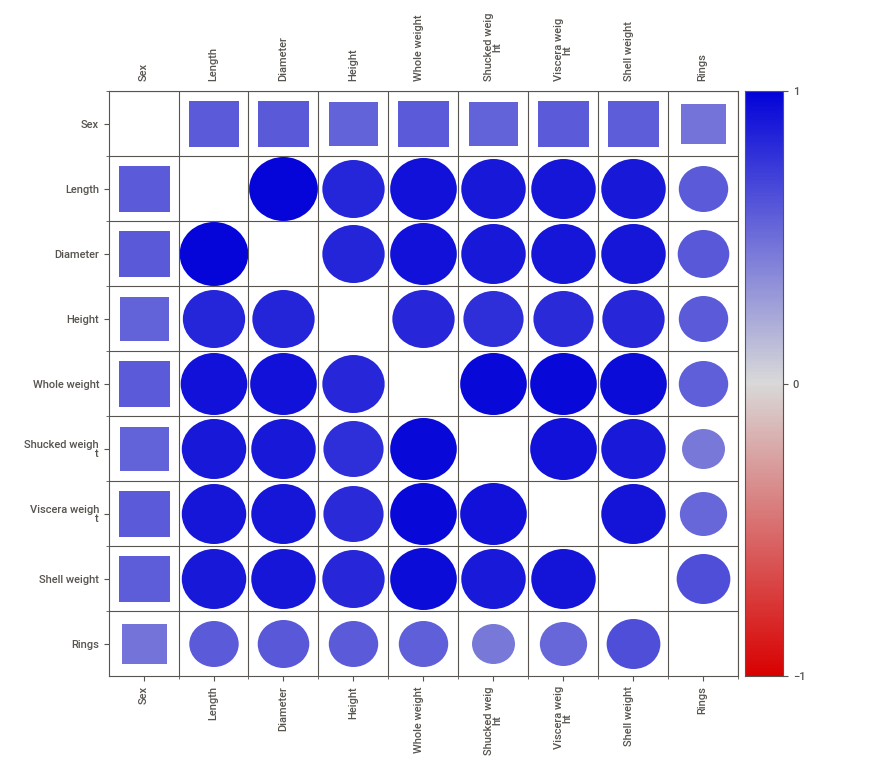
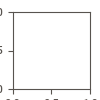

In [14]:
sweetviz.analyze(df1).show_notebook()

In [15]:
df1.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

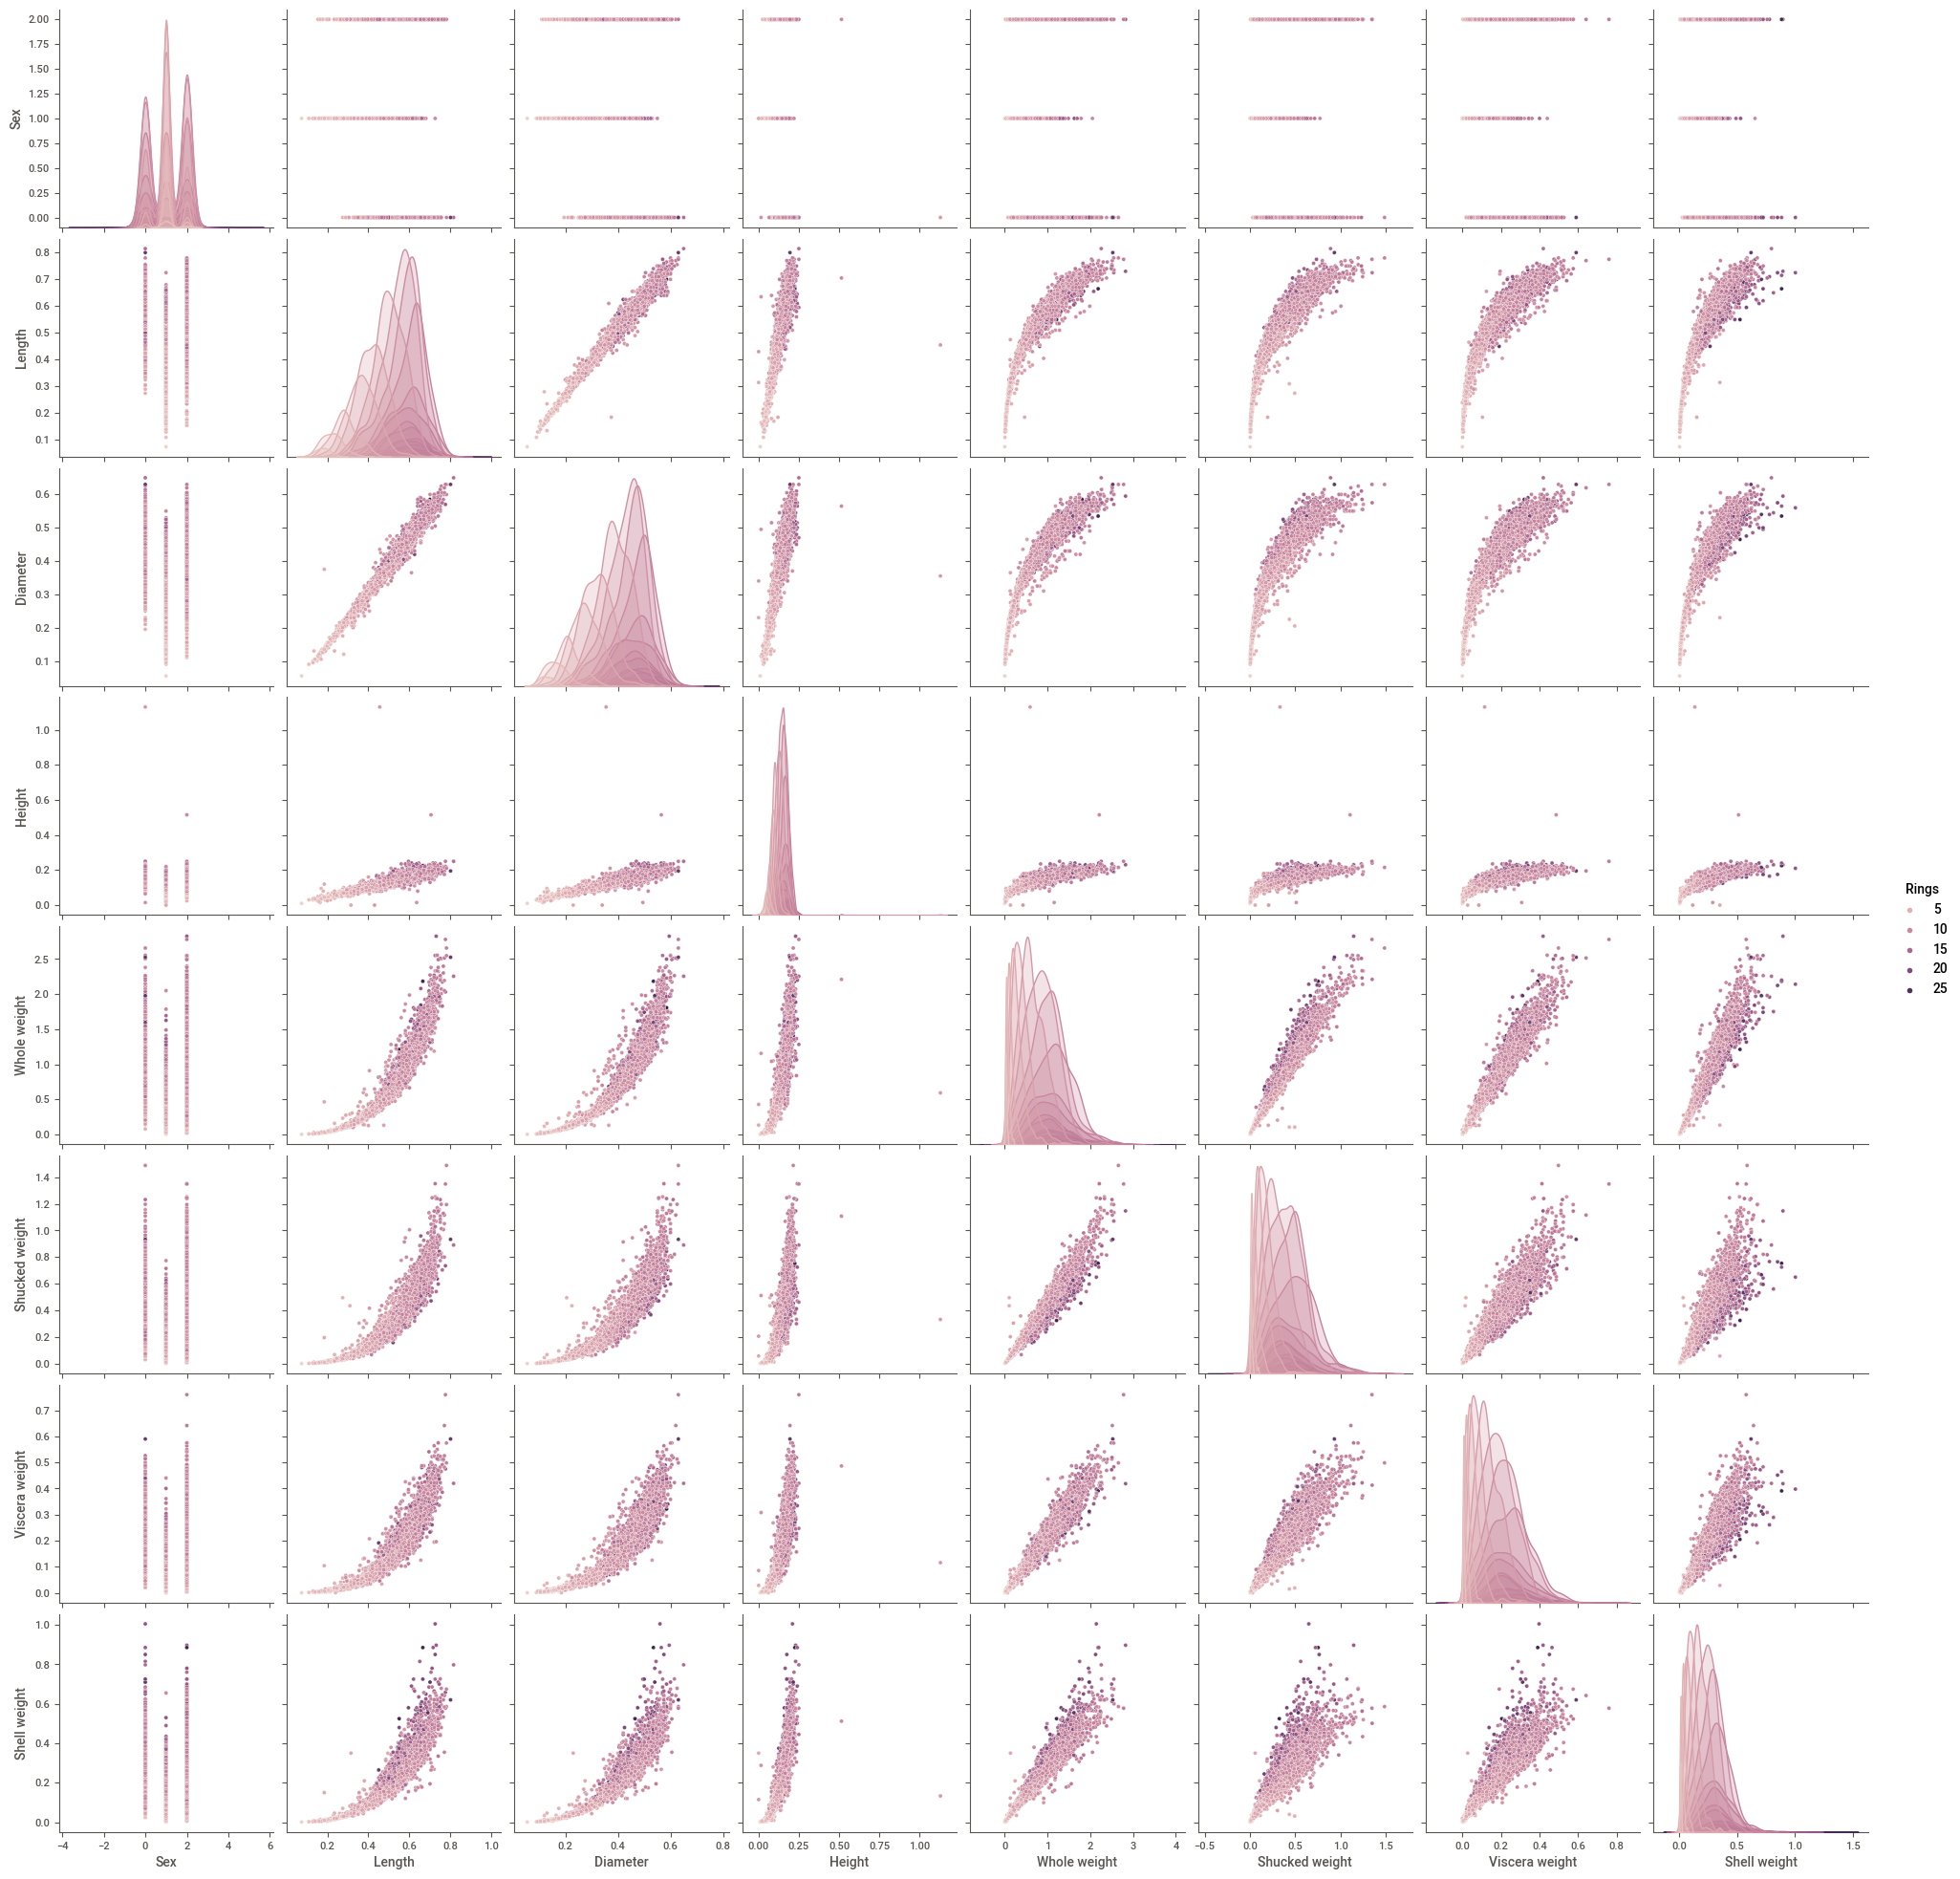

In [16]:
import seaborn as sns

sns.pairplot(data,
             vars=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
            hue ='Rings')
plt.show()

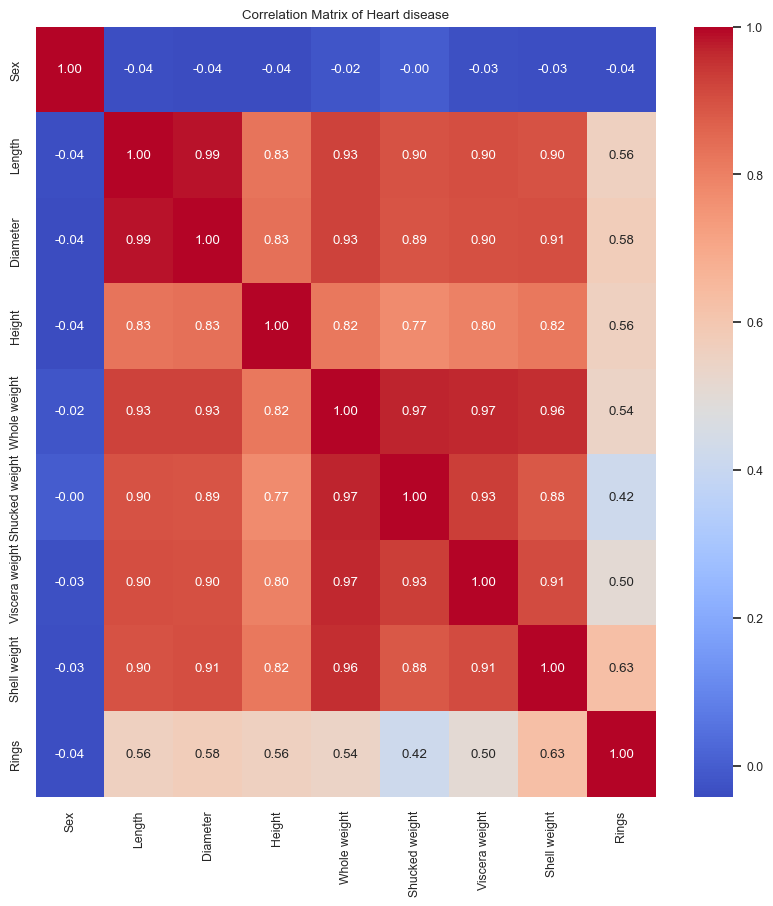

In [17]:
#상관 관계 행렬
data_corr=df1.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt='.2f')
#sns.heatmap(data_corr, annot=True, cbar=False)
plt.title('Correlation Matrix of Heart disease')
plt.show()

In [18]:
df1.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

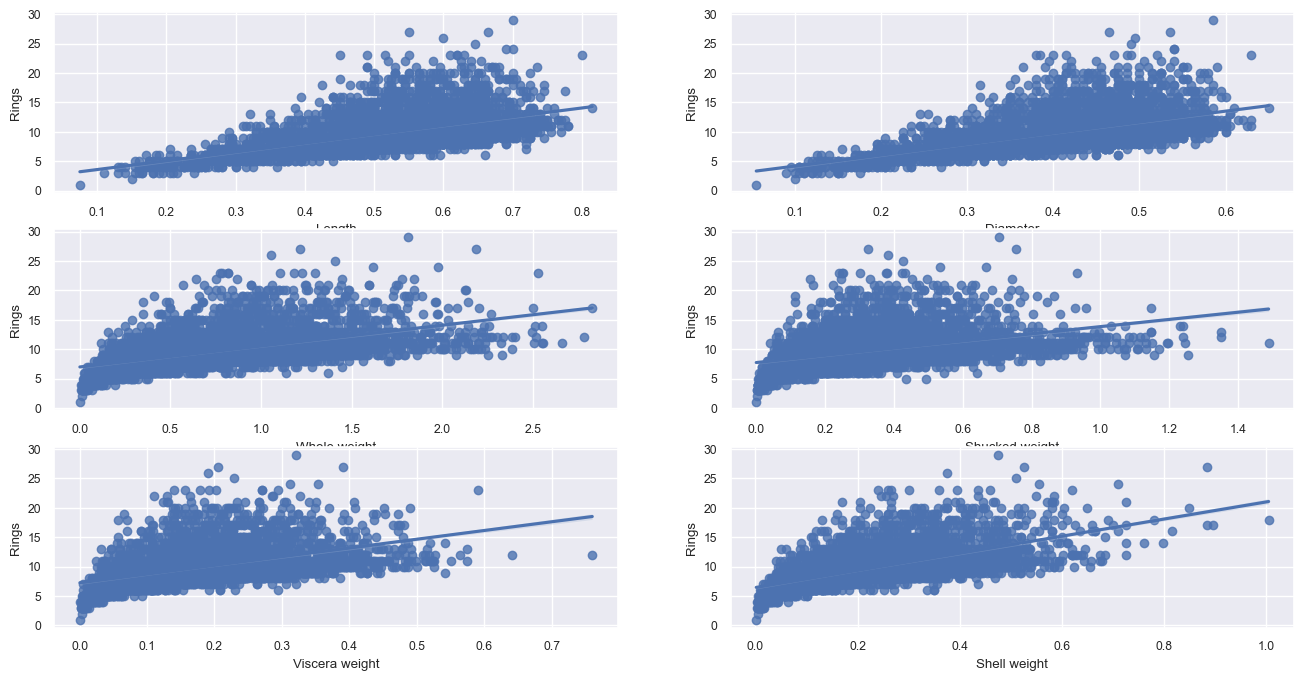

In [19]:
fig, axs = plt.subplots(figsize=(16,8), ncols=2, nrows=3)

lm_features = ['Length','Diameter', 'Whole weight', 'Shucked weight','Viscera weight','Shell weight']

# i에는 인덱스가 feature에가 들어감
for i, feature in enumerate(lm_features):
    row = int(i/2) # 3행
    col = i%2

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='Rings', data=df1, ax=axs[row][col])

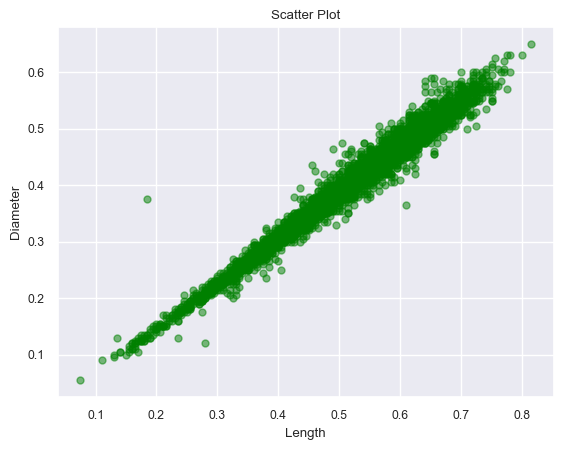

In [20]:
plt.plot('Length', 'Diameter', 
         data=df1,
         linestyle='none', 
         marker='o', 
         markersize=5,
         color='Green', 
         alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.show()

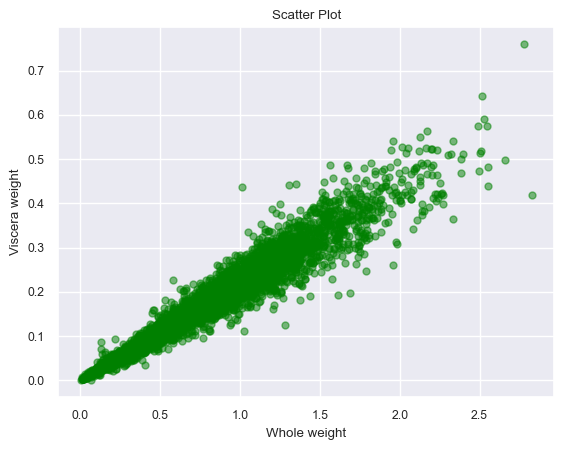

In [21]:
plt.plot('Whole weight', 'Viscera weight', 
         data=df1,
         linestyle='none', 
         marker='o', 
         markersize=5,
         color='Green', 
         alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('Whole weight')
plt.ylabel('Viscera weight')
plt.show()

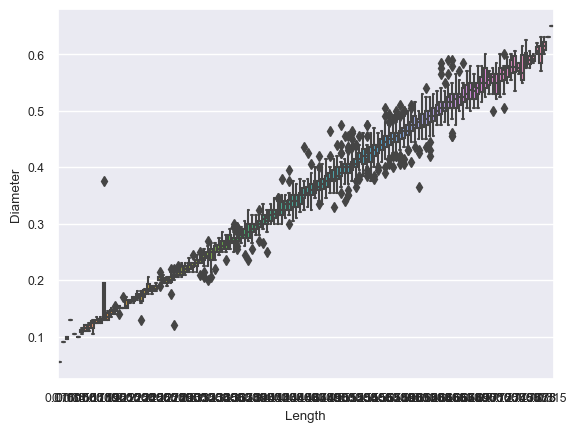

In [22]:
sns.boxplot(x='Length', y='Diameter', data=df1)
plt.show()


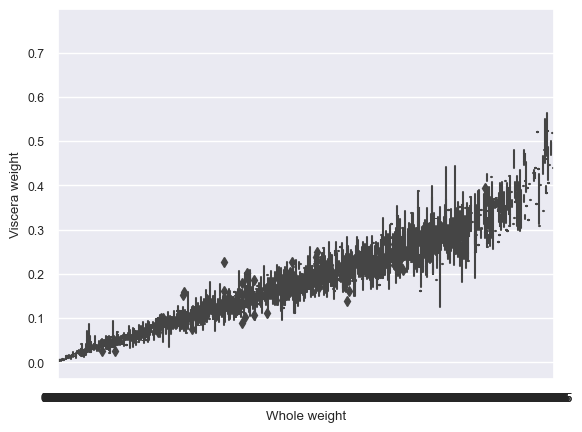

In [23]:
sns.boxplot(x='Whole weight', y='Viscera weight', data=df1)
plt.show()

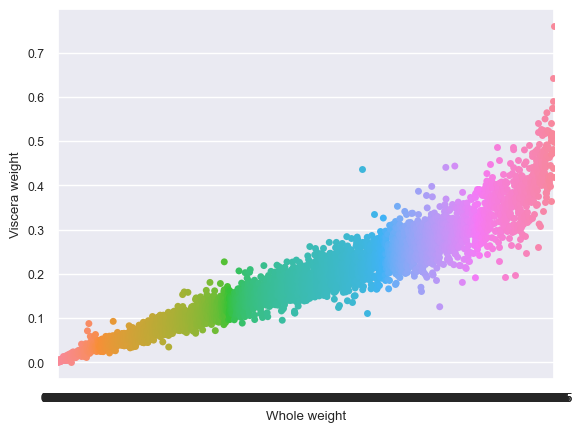

In [24]:
sns.stripplot(x='Whole weight', y='Viscera weight', data=df1, jitter=True, edgecolor="gray", size=5)
plt.show()

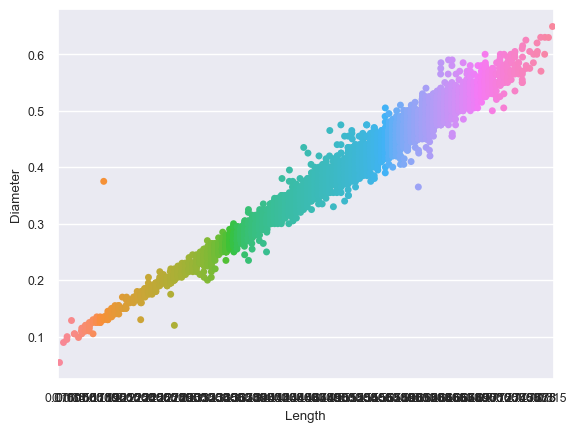

In [25]:
sns.stripplot(x='Length', y='Diameter', data=df1, jitter=True, edgecolor="gray", size=5)
plt.show()

In [32]:
#Set x and y values
x = df1
x = x.drop(columns=['Rings'], axis=1)
y = df1['Rings']
#normalization
x=(x-np.min(x))/(np.max(x)-np.min(x))

C:\Users\charl\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\charl\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [33]:
# train/test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=400)

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor

clf_dt = DecisionTreeRegressor()
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print(clf_dt.score(X_train, y_train))

1.0


In [35]:
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 3.059419527768291


In [36]:
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor()
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

print(rf_clf.score(X_train, y_train))

0.9348051092298926


In [37]:
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.170302329390294


In [38]:
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print(clf_lr.score(X_train, y_train))

0.5275061350907091


In [39]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.1626928102563054


In [40]:
from sklearn.svm import SVR

clf_svm = SVR()
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print(clf_svm.score(X_train, y_train))

0.5187405599947499


In [41]:

mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.200916974338837
